<a href="https://colab.research.google.com/github/jeevanpuchakay/MLAssignments/blob/main/tutorial_ridge_regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS 403/603 Machine Learning Ridge Regression (L2 Regularization)

minimizes the following cost function:

\begin{equation}
J(x, \theta, y) = \sum_{i=1}^{m}(\theta^T\bar{x}_i - y_i)^2 + \lambda ||\theta||^2
\end{equation}

**Ridge Regression**


*   It uses L2 Regularization


*   It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.

*  It reduces the model complexity by coefficient shrinkage.





In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salary_data.csv to salary_data.csv


In [ ]:
# Importing libraries
  
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Ridge Regression
  
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b
      

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
  
# Ridge Regression
  
class RidgeRegression1() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) )/ self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

In [ ]:
def main1() :
      
    # Importing dataset    
    df = pd.read_csv( "/content/salary_data.csv" )
    print(df)
    
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, 1].values    
  
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                                            
                                          test_size = 1 / 3, random_state = 0 )
      
    # Model training    
    model = RidgeRegression1( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 1 )
    model.fit( X_train, Y_train )
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )     
    print( "Real values      ", Y_test[:3] )    
    print( "Trained W        ", round( model.W[0], 2 ) )    
    print( "Trained b        ", round( model.b, 2 ) )
      
    # Visualization on test set     
    plt.scatter( X_test, Y_test, color = 'blue' )    
    plt.plot( X_test, Y_pred, color = 'orange' )    
    plt.title( 'Salary vs Experience' )    
    plt.xlabel( 'Years of Experience' )    
    plt.ylabel( 'Salary' )    
    plt.show()

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872
Predicted values  [ 40594.69 123305.18  65031.88]
Real values       [ 37731 122391  57081]
Trained W         9398.92
Trained b      

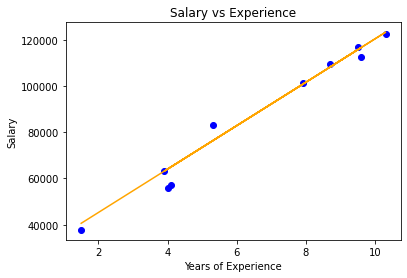

In [ ]:
main1()

In [ ]:
 df = pd.read_csv( "/content/salary_data.csv" )
 print(df)

    YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


In [ ]:
# Driver code
def main() :
      
    # Importing dataset    
    df = pd.read_csv( "/content/salary_data.csv" )
    print(df)
    
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, 1].values    
  
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split( X, Y, 
                                            
                                          test_size = 1 / 3, random_state = 0 )
      
    # Model training    
    model = RidgeRegression( iterations = 1000,                             
                            learning_rate = 0.01, l2_penality = 1 )
    model.fit( X_train, Y_train )
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    print( "Predicted values ", np.round( Y_pred[:3], 2 ) )     
    print( "Real values      ", Y_test[:3] )    
    print( "Trained W        ", round( model.W[0], 2 ) )    
    print( "Trained b        ", round( model.b, 2 ) )
      
    # Visualization on test set     
    plt.scatter( X_test, Y_test, color = 'blue' )    
    plt.plot( X_test, Y_pred, color = 'orange' )    
    plt.title( 'Salary vs Experience' )    
    plt.xlabel( 'Years of Experience' )    
    plt.ylabel( 'Salary' )    
    plt.show()

Predicted values  [ 40831.44 122898.14  65078.42]
Real values       [ 37731 122391  57081]
Trained W         9325.76
Trained b         26842.8


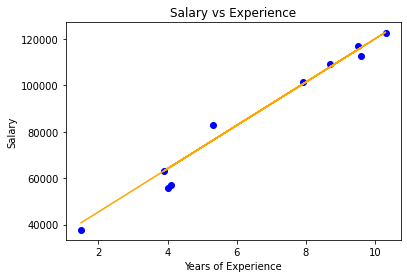

In [ ]:
if __name__ == "__main__" : 
    main()

In [ ]:
Predicted values  [ 40831.44 122898.14  65078.42]
Real values       [ 37731 122391  57081]
Trained W         9325.76
Trained b         26842.8


Predicted values  [ 40594.69 123305.18  65031.88]
Real values       [ 37731 122391  57081]
Trained W         9398.92
Trained b         26496.31
